In [20]:
import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from keras.applications import VGG16
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
# Paths and parameters
best_cars_model_path = 'best_cars_model.h5'
train_cars_dataset_path = 'data/cars_train/train'
test_cars_dataset_path = 'data/cars_train/test'
mean = np.array([0.4708, 0.4602, 0.4550])
std = np.array([0.2593, 0.2584, 0.2634])

In [22]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    horizontal_flip=True,
    rotation_range=10,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.5, 1.5]
)
train_datagen.mean = mean
train_datagen.std = std

train_generator = train_datagen.flow_from_directory(
    train_cars_dataset_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True
)
test_datagen.mean = mean
test_datagen.std = std

test_generator = test_datagen.flow_from_directory(
    test_cars_dataset_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

Found 6442 images belonging to 196 classes.
Found 1702 images belonging to 196 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Labels: [119  53 165  26  91  65  60   5  27 139 161 124  73  41  42 148 150 118
  31  43  49 169 194 106  31 154 106 153  63 168  53  83 102 133 115 165
 127 112  92 167  68  75  42 125 172  17  57  69 159 109 118 116  82 162
  92 125 191 107 118 177  94 147  23 117]


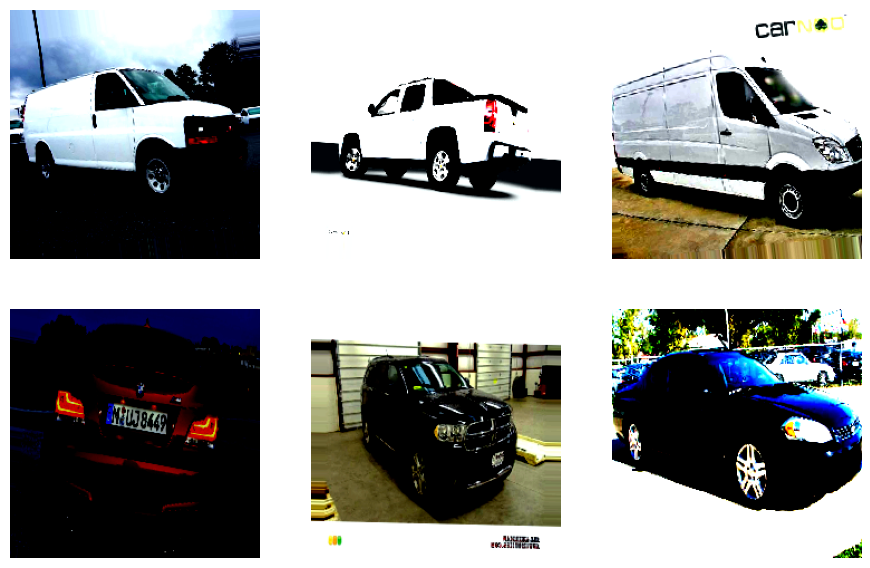

In [23]:
# Display some images
def show_transformed_images(generator, num_images=6):
    images, labels = next(generator)
    print(f"Labels: {np.argmax(labels, axis=1)}")
    plt.figure(figsize=(11,11))
    for i in range(num_images):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.show()

show_transformed_images(train_generator)

In [24]:
# Defining CNN model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
num_classes = len(train_generator.class_indices)

for layer in base_model.layers:
  layer.trainable = False

model = Sequential([ 
  base_model,
  Flatten(),
  Dense(256, activation='relu'),
  Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               6422784   
                                                                 
 dense_5 (Dense)             (None, 196)               50372     
                                                                 
Total params: 21187844 (80.83 MB)
Trainable params: 6473156 (24.69 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [25]:
# Callbacks for saving the best model
checkpoint = ModelCheckpoint(best_cars_model_path, monitor='val_accuracy', save_best_only=True, mode='max')

In [26]:
# Train the model
history = model.fit(
  train_generator,
  epochs=100,
  validation_data=test_generator,
  callbacks=[checkpoint],
)

Epoch 1/100
101/101 [==============================] - 517s 5s/step - loss: 5.3078 - accuracy: 0.0073 - val_loss: 5.1694 - val_accuracy: 0.0159
Epoch 2/100


c:\Users\rauls\anaconda3\envs\directML\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


101/101 [==============================] - 518s 5s/step - loss: 5.0486 - accuracy: 0.0183 - val_loss: 4.8987 - val_accuracy: 0.0229
Epoch 3/100
101/101 [==============================] - 517s 5s/step - loss: 4.7338 - accuracy: 0.0295 - val_loss: 4.5685 - val_accuracy: 0.0417
Epoch 4/100
101/101 [==============================] - 517s 5s/step - loss: 4.3445 - accuracy: 0.0548 - val_loss: 4.2522 - val_accuracy: 0.0599
Epoch 5/100
101/101 [==============================] - 516s 5s/step - loss: 4.0682 - accuracy: 0.0773 - val_loss: 4.0984 - val_accuracy: 0.0699
Epoch 6/100
101/101 [==============================] - 517s 5s/step - loss: 3.8401 - accuracy: 0.0950 - val_loss: 3.9394 - val_accuracy: 0.0852
Epoch 7/100
101/101 [==============================] - 518s 5s/step - loss: 3.6238 - accuracy: 0.1186 - val_loss: 3.8475 - val_accuracy: 0.0875
Epoch 8/100
101/101 [==============================] - 517s 5s/step - loss: 3.4842 - accuracy: 0.1391 - val_loss: 3.7673 - val_accuracy: 0.1075
Epoc

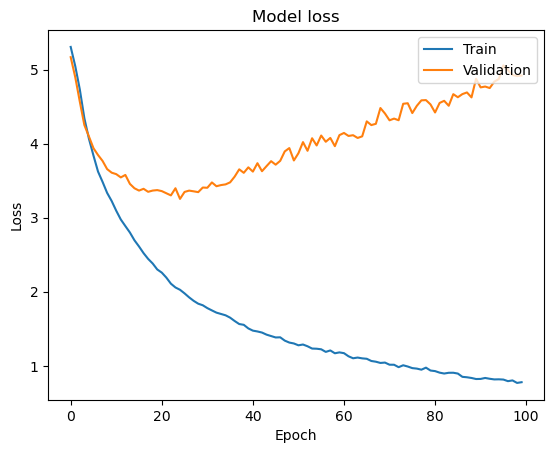

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [28]:
# Load the best model
best_model = load_model(best_cars_model_path)

# Evaluation
train_loss, train_acc = best_model.evaluate(train_generator, verbose=0)
print(f'Train loss: {train_loss}')
print(f'Train accuracy: {train_acc}')

test_loss, train_acc = best_model.evaluate(test_generator, verbose=0)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {train_acc}')

Train loss: 0.762180507183075
Train accuracy: 0.7716547846794128
Test loss: 4.752195358276367
Test accuracy: 0.27379554510116577


In [29]:
# Prediction and metrics
predictions = best_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

27/27 [==============================] - 124s 5s/step


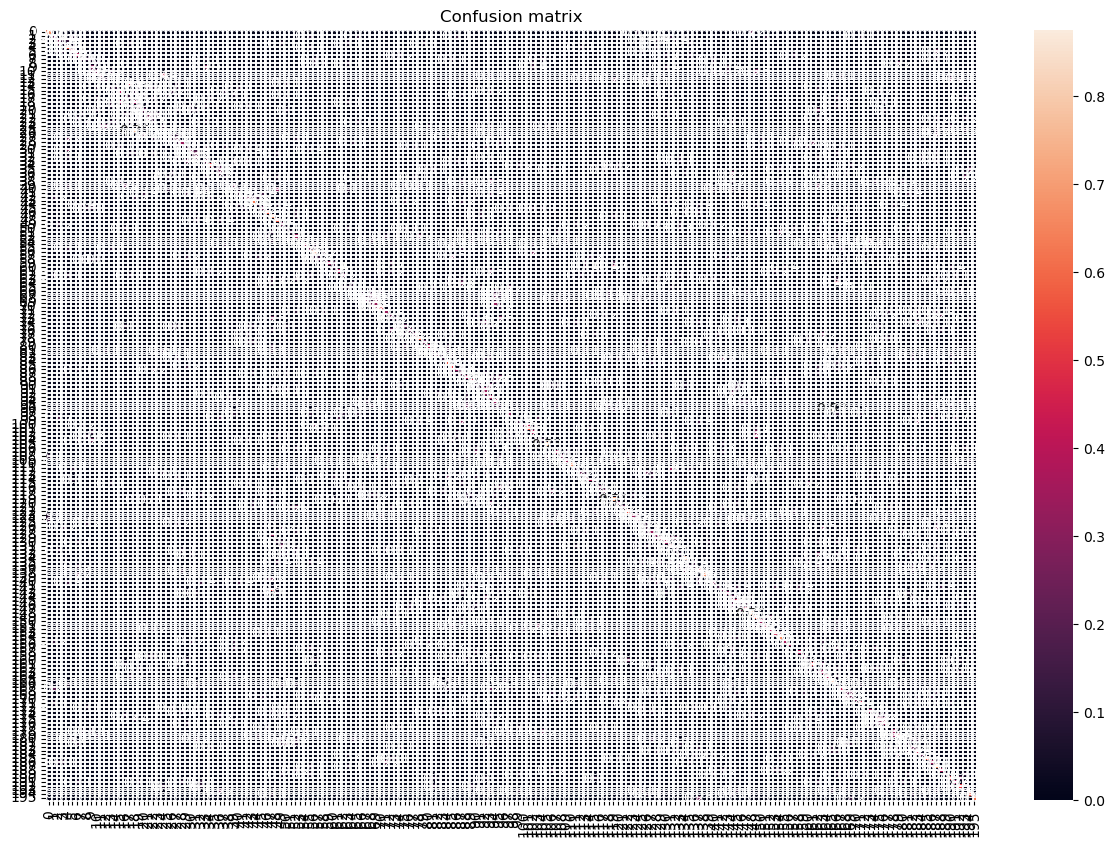

In [30]:
confusion_mtx = confusion_matrix(true_classes, predicted_classes, normalize='true')

plt.figure(figsize=(15, 10))
sns.heatmap(confusion_mtx, annot=True, xticklabels=sorted(set(true_classes)), yticklabels=sorted(set(true_classes)))
plt.title('Confusion matrix')
plt.show()

In [31]:
print('Classification Report')
print(classification_report(true_classes, predicted_classes))

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.25      0.22      0.24         9
           2       0.22      0.29      0.25         7
           3       0.20      0.11      0.14         9
           4       0.29      0.56      0.38         9
           5       0.40      0.44      0.42         9
           6       0.25      0.38      0.30         8
           7       0.17      0.11      0.13         9
           8       0.00      0.00      0.00         9
           9       0.20      0.29      0.24         7
          10       0.25      0.25      0.25         8
          11       0.40      0.22      0.29         9
          12       0.25      0.11      0.15         9
          13       0.00      0.00      0.00         9
          14       0.50      0.11      0.18         9
          15       0.38      0.38      0.38         8
          16       0.11      0.11      0.11         9
     

c:\Users\rauls\anaconda3\envs\directML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rauls\anaconda3\envs\directML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rauls\anaconda3\envs\directML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
